# Module 9: Multiple regression analysis and PCA

## Outline

* Multiple linear regression revisited
    * Parameter estimation for two predictors
    * Model selection guidelines
* Principle component analysis


In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

from mpl_toolkits.mplot3d import Axes3D
import statsmodels.formula.api as sm

## Reminder: the concept of multiple linear regression

We extend the concept of simple linear regression to include several independent variables $X_i$ to predict the dependent variable $Y$ with a linear equation of the form:

$$Y=a+b_1 X_1+b_2 X_2+...+b_k X_k +e$$


Note, also models that are not linear in $b_i$ can be transformed to the above form to be treated as linear (e.g. taking the log of $Y=a X^b$).

To use this model for **predictions** and **parameter significance tests**, we assume:
* The independent variable can predict the dependent one, but not vice-versa. It is a one-way analysis
* Independent variable are justified theoretically
* Independent variables are strongly correlated with the dependent one, but only weakly correlated among each other
* Note however, that "the independent" variables will almost always have some correlation between each other. Such *multicolinearity* is not so much a problem for the predictive ability of the linear model, but it complicates the interpretation of the $b$s.
* Each independent variable has the same relationship with the dependent one at any value of the other independent variables ($Y$-$X_i$ relations are consistent)
* The residuals are normally distributed (i.e. the conditional distribution of Y at each combination of predictors follows a normal distribution)

Our analysis aims to
* Determine the parameters of the regression equation
    - Determine the percent of the variability in $Y$ that is accounted for by the regression ($R^2$)
    - Test the statistical significance of the regression
* Determine the relative importance of different $X_i$ (model selection)

### Parameter estimation for two predictors

Let's use a model with two predictors:

$$z=a+b x + c y $$

We fit the model to the data (i.e. estimate the parameters) by minimising the squared differences between our observations and the fit plane:

$$ \Pi = \sum_{i=1} ^n (z_i - \hat{z_i})^2 = \sum_{i=1} ^n (z_i - (a+b x_i + c y_i) )^2 $$

We find the minimum of $\Pi$ by setting its derivatives after the parameters $a$, $b$ and $c$ to zero...

This procedure yields a linear equation system, with a unique solution for each parameter.

### Example analysis

Let's make a model for summertime evapotranspiration in Arctic tundra

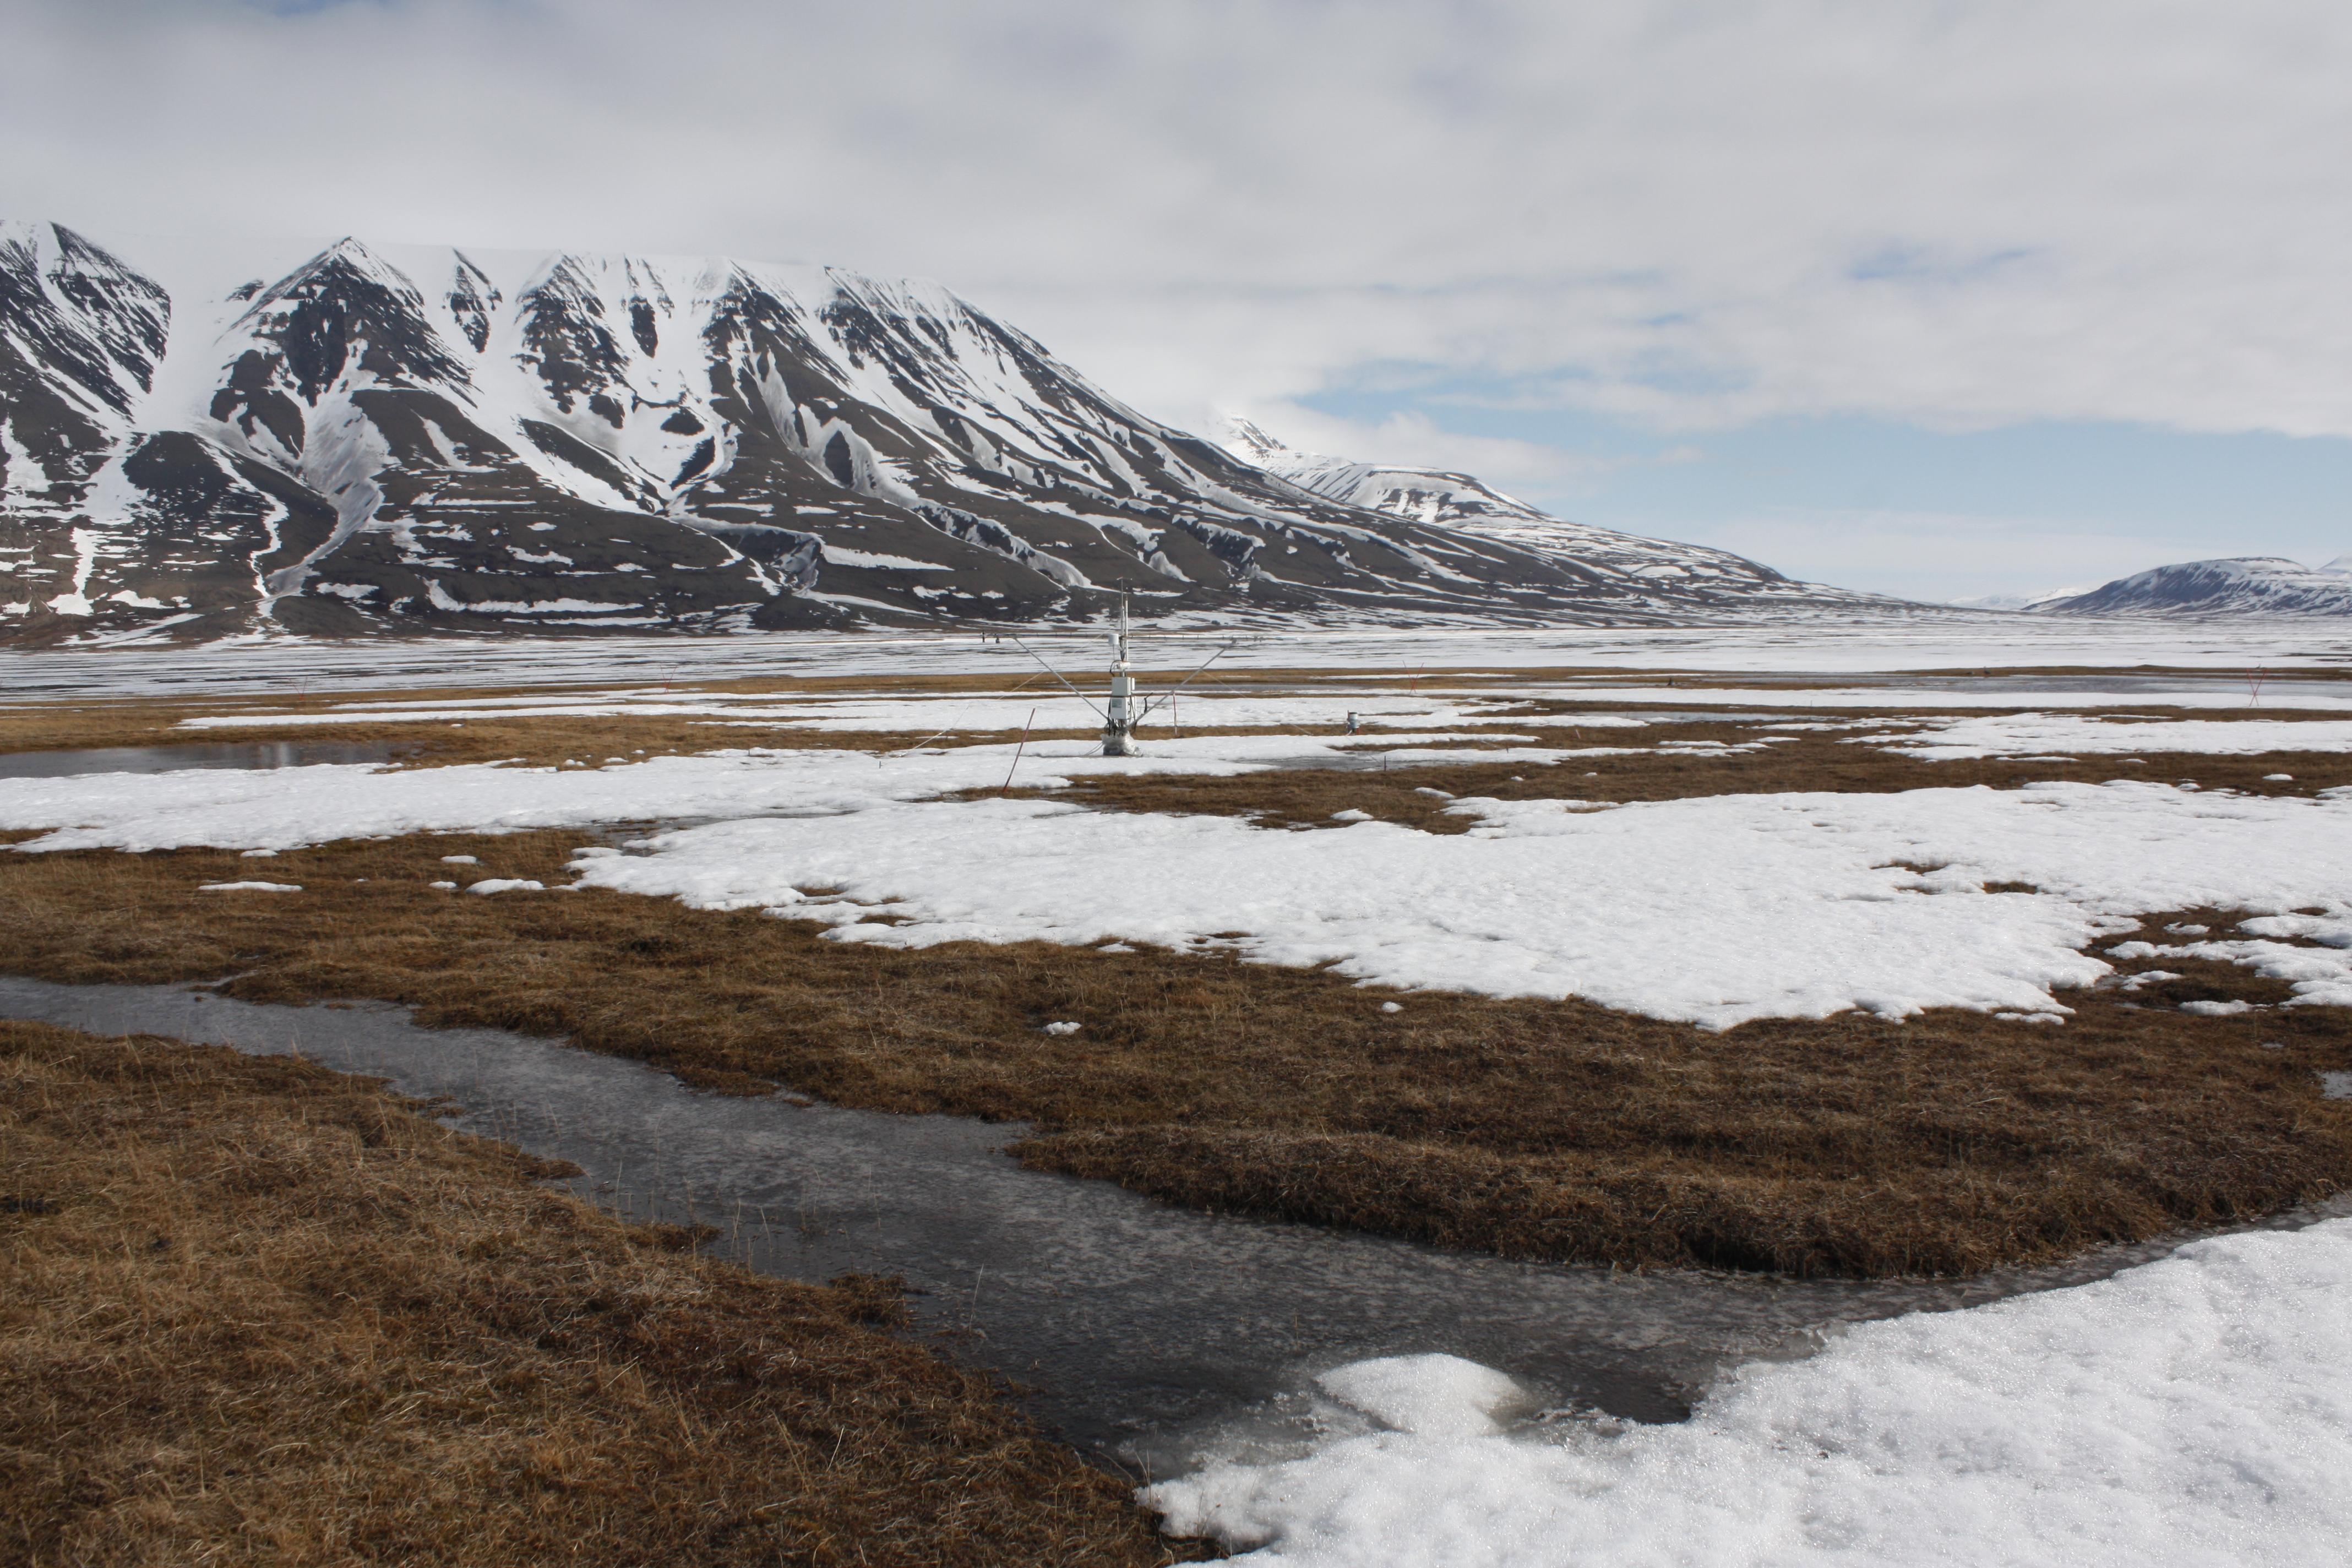


In [2]:
df = pd.read_csv('ET_Adv.csv',index_col=0,parse_dates=True)
df.head()


LE     T_air     P_air    RH_air  wind_speed  \
2015-06-01 08:30:00  14.214441  2.325161  1016.879  80.66074    4.772366   
2015-06-01 09:00:00  19.277794  2.337333  1016.794  81.91886    5.305324   
2015-06-01 09:30:00  15.617140  2.172278  1016.808  82.21066    6.061701   
2015-06-01 10:00:00  13.875763  1.998183  1016.796  81.75561    6.341284   
2015-06-01 10:30:00  20.214911  2.332133  1016.831  80.23505    6.026446   

                       wind_dir        Enet  ground_heat_flux  
2015-06-01 08:30:00  107.143311  348.956594          13.66815  
2015-06-01 09:00:00  105.781836  351.893543          15.08879  
2015-06-01 09:30:00  104.992899  411.856762          16.15566  
2015-06-01 10:00:00  104.451852  304.556982          16.54310  
2015-06-01 10:30:00  106.673256  385.062730          16.01460

<IPython.core.display.Javascript object>


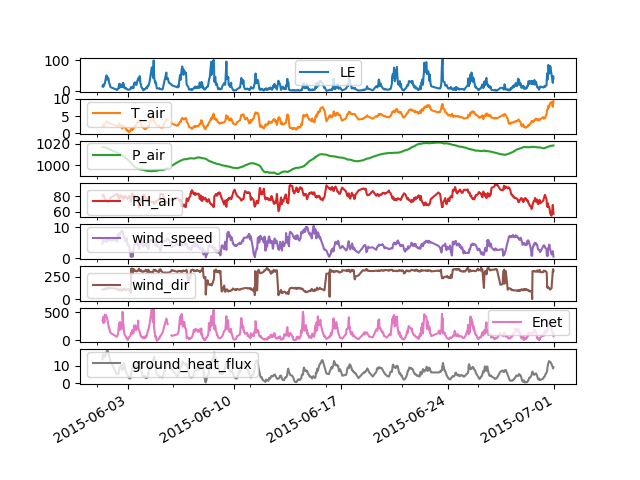

array([<matplotlib.axes._subplots.AxesSubplot object at 0x108bb0e80>,
      dtype=object)

In [4]:
df.plot(subplots=True)


<IPython.core.display.Javascript object>


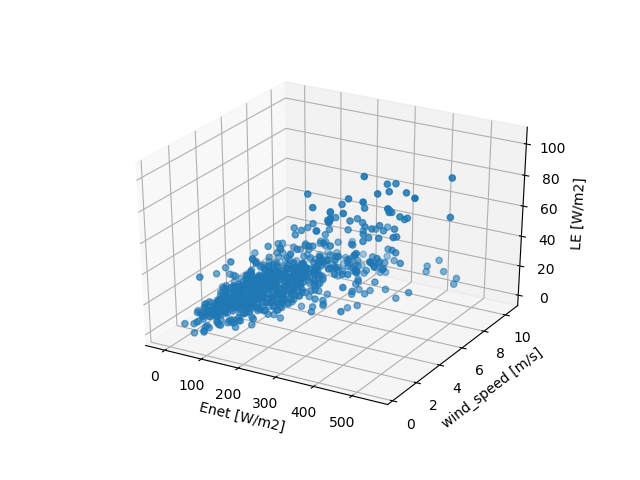

Text(0.5,0,'LE [W/m2]')

In [5]:
# use two predictors, Enet and wind_speed, to estimate LE. I.e.:
# LE->z
# Enet->x
# wind_speed->y

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df['Enet'], df['wind_speed'], df['LE'])

ax.set_xlabel('Enet [W/m2]')
ax.set_ylabel('wind_speed [m/s]')
ax.set_zlabel("LE [W/m2]")


In [6]:
# solve the linear system in matrix form

S_z=df['LE'].sum()
S_xz=(df['Enet']*df['LE']).sum()
S_yz=(df['wind_speed']*df['LE']).sum()

S_1=len(df)
S_x=df['Enet'].sum()
S_y=df['wind_speed'].sum()

S_x2=(df['Enet']**2).sum()
S_xy=(df['Enet']*df['wind_speed']).sum()

S_xy=(df['Enet']*df['wind_speed']).sum()
S_y2=(df['wind_speed']**2).sum()


A = np.matrix([[ S_1, S_x,  S_y], 
               [ S_x, S_x2, S_xy], 
               [ S_y, S_xy, S_y2]])

b = np.array([S_z, S_xz, S_yz])

print(A)
print(b)

print("\nSo our parameter estimates a, b and c become")
print( (A.I).dot(b) )


[[8.64000000e+02 1.23718254e+05 4.06215967e+03]
 [1.23718254e+05 2.81629521e+07 6.08529463e+05]
 [4.06215967e+03 6.08529463e+05 2.22240622e+04]]
[  16637.92051063 3728978.09606426   76821.40725312]

So our parameter estimates a, b and c become
[[ 7.69830877  0.13298038 -1.59164554]]


In [7]:
# same thing using the statsmodel package

model = sm.ols("LE ~ Enet + wind_speed", df).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                     LE   R-squared:                       0.614
Model:                            OLS   Adj. R-squared:                  0.613
Method:                 Least Squares   F-statistic:                     684.3
Date:                Tue, 20 Oct 2020   Prob (F-statistic):          1.51e-178
Time:                        08:49:47   Log-Likelihood:                -3333.3
No. Observations:                 863   AIC:                             6673.
Df Residuals:                     860   BIC:                             6687.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.6736      1.110      6.912      0.0

In [8]:
# to get a feeling for these statistics, here a model without any significance

df['rv1']=np.random.normal(loc=0.,scale=1.,size=len(df))
df['rv2']=np.random.normal(loc=10.,scale=0.1,size=len(df))

model2 = sm.ols("LE ~ rv1 + rv2", df).fit()
print(model2.summary())


                            OLS Regression Results                            
Dep. Variable:                     LE   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.181
Date:                Tue, 20 Oct 2020   Prob (F-statistic):              0.307
Time:                        08:49:48   Log-Likelihood:                -3746.9
No. Observations:                 864   AIC:                             7500.
Df Residuals:                     861   BIC:                             7514.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     81.7339     66.675      1.226      0.2

<IPython.core.display.Javascript object>


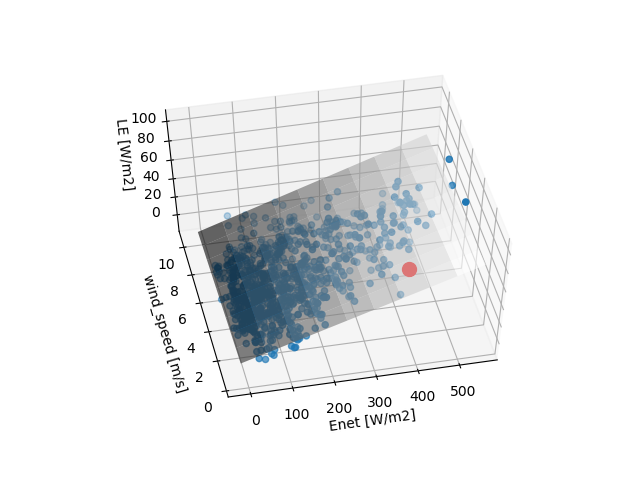

57.82375215231476

In [9]:
# repeat the plot, now also with the fit plane

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df['Enet'], df['wind_speed'], df.LE)

ax.set_xlabel('Enet [W/m2]')
ax.set_ylabel('wind_speed [m/s]')
ax.set_zlabel("LE [W/m2]")

x_range = np.linspace(df['Enet'].min(), df['Enet'].max(), 10)
y_range = np.linspace(df['wind_speed'].min(), df['wind_speed'].max(), 10)

X, Y = np.meshgrid(x_range, y_range)

a,b,c=model.params
Z=a+b*X+c*Y

surf = ax.plot_surface(X, Y, Z,cmap=plt.cm.binary_r, alpha=0.6)


# what is the estimated evapotranspiration of a period with Enet=400 W/m2 and wind_speed=2 m/s
ax.scatter(400., 2., a+b*400.+c*2.,color='r',s=100)
a+b*400.+c*2.


<IPython.core.display.Javascript object>


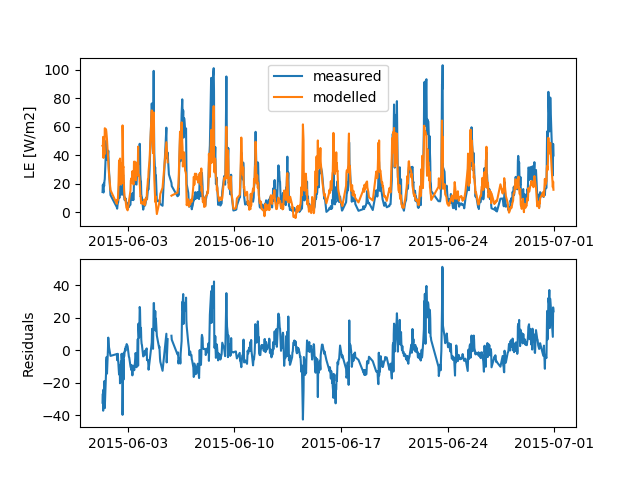

Text(0,0.5,'Residuals')

In [10]:
#use the model (a,b and c) to make a prediction

fig=plt.figure()
ax1=fig.add_subplot(211)
ax2=fig.add_subplot(212,sharex=ax1)

df['LE_est']=a + b*df['Enet'] + c*df['wind_speed']

ax1.plot(df.index, df.LE, label='measured')
ax1.plot(df.index, df.LE_est, label='modelled')
ax1.set_ylabel('LE [W/m2]')
ax1.legend()

# serial correlation of errors
ax2.plot(df.index, df.LE-df.LE_est)
ax2.set_ylabel('Residuals')


#### Serial correlation of errors

* The residuals should not have significant serial correlation
* A serial correlation of errors would leave the coeficient estimates unbiased, but their variances would be incorrect, which affects hypothesis testing
* Also, a pattern can hint towards which variable is missing in the model
* The Durbin-Watson test quantifies serial correlation of error at lag=1

### Model selection guidelines

For physically-based models, one typically uses process understanding and some intuition to chose predictors. This can be done stepwise, increasing or decreasing the number of predictors, and comparing the model performance (e.g. $R^2$ and AIC).

For truly statistical models, with a large number of predictors (up to 1/3 of #observations) and little underlaying process understanding, the dataset is often devided into a training and test dataset.

Generally, the **principle of parsimony** should be applied when selecting a model, because over-specified models may increase the prediction uncertainty.

The correlation matrix can help to find good predictors for the dependent variable, and discard correlated independent variables.

In [11]:
df.corr()

LE     T_air     P_air    RH_air  wind_speed  \
LE                1.000000  0.459528  0.157249 -0.646002   -0.046088   
T_air             0.459528  1.000000  0.492528 -0.229022   -0.197019   
P_air             0.157249  0.492528  1.000000 -0.061375   -0.225167   
RH_air           -0.646002 -0.229022 -0.061375  1.000000    0.093710   
wind_speed       -0.046088 -0.197019 -0.225167  0.093710    1.000000   
wind_dir          0.080951  0.298205  0.158942  0.105563   -0.503882   
Enet              0.766504  0.370330  0.116597 -0.297313    0.149785   
ground_heat_flux  0.566592  0.316996  0.005190 -0.240253   -0.042477   
rv1              -0.041459  0.035200 -0.020966 -0.013671    0.018812   
rv2              -0.032203 -0.052355 -0.045907  0.004607    0.000751   
LE_est            0.783654  0.415358  0.165104 -0.319898   -0.059204   

                  wind_dir      Enet  ground_heat_flux       rv1       rv2  \
LE                0.080951  0.766504          0.566592 -0.041459 -0.032203   
T_air             0.298205  0.370330          0.316996  0.035200 -0.052355   
P_air             0.158942  0.116597          0.005190 -0.020966 -0.045907   
RH_air            0.105563 -0.297313         -0.240253 -0.013671  0.004607   
wind_speed       -0.503882  0.149785         -0.042477  0.018812  0.000751   
wind_dir          1.000000  0.012171          0.107688 -0.013123 -0.035767   
Enet              0.012171  1.000000          0.675170 -0.055823 -0.024412   
ground_heat_flux  0.107688  0.675170          1.000000 -0.021974  0.010760   
rv1              -0.013123 -0.055823         -0.021974  1.000000  0.007233   
rv2              -0.035767 -0.024412          0.010760  0.007233  1.000000   
LE_est            0.118459  0.978116          0.690615 -0.060453 -0.024782   

                    LE_est  
LE                0.783654  
T_air             0.415358  
P_air             0.165104  
RH_air           -0.319898  
wind_speed       -0.059204  
wind_dir          0.118459  
Enet              0.978116  
ground_heat_flux  0.690615  
rv1              -0.060453  
rv2              -0.024782  
LE_est            1.000000

In [12]:
model_1 = sm.ols("LE ~ Enet + wind_speed", df).fit() #our reference model we used above

model_2 = sm.ols("LE ~ Enet + RH_air", df).fit()
model_3 = sm.ols("LE ~ Enet + T_air", df).fit()
model_4 = sm.ols("LE ~ Enet + RH_air + T_air + wind_speed", df).fit()

#the full model:
model_5 = sm.ols("LE ~ T_air + P_air + RH_air + wind_speed + wind_dir + Enet + ground_heat_flux", df).fit()

#the full model, plus a random variable
model_6 = sm.ols("LE ~ T_air + P_air + RH_air + wind_speed + wind_dir + Enet + ground_heat_flux + rv1", df).fit()

model_7 = sm.ols("LE ~ RH_air + wind_speed", df).fit()
model_8 = sm.ols("LE ~ T_air + wind_speed", df).fit()

model_list=[model_1,model_2,model_3,model_4,model_5,model_6,model_7,model_8]


In [13]:
for this_model in model_list:
    print(this_model.model.formula)
    print(this_model.rsquared_adj)
    #print(this_model.aic)
    #print(this_model.pvalues)
    print("\n")
    

LE ~ Enet + wind_speed
0.6132155953540352


LE ~ Enet + RH_air
0.7787826702420457


LE ~ Enet + T_air
0.6224171243124571


LE ~ Enet + RH_air + T_air + wind_speed
0.8003186564985568


LE ~ T_air + P_air + RH_air + wind_speed + wind_dir + Enet + ground_heat_flux
0.8032388152332265


LE ~ T_air + P_air + RH_air + wind_speed + wind_dir + Enet + ground_heat_flux + rv1
0.8032965064026341


LE ~ RH_air + wind_speed
0.4161651322503035


LE ~ T_air + wind_speed
0.21136317496592816




<IPython.core.display.Javascript object>


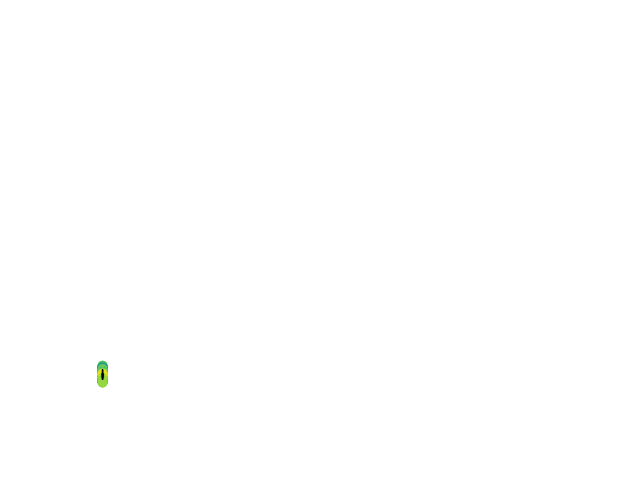

In [14]:
# based on these statistics, we may chose model_5, the "full model"
# there are enough observations for these few predictors
# or we argue physically, and only include physically relevant predictors

plt.bar(range(1,len(model_list)+1),
        [this_model.rsquared_adj for this_model in model_list])

for mn,this_model in enumerate(model_list):
    plt.text(mn+1, 0, this_model.model.formula, rotation=90, va='bottom', ha='center', fontsize=7)


## Principal component analysis

Assume you have a large, high-dimensional dataset, and you suspect that some variables are correlated. How could you **explore** such large multivariate datasets and **identify a few, important variables**? If there are many strong correlations in the dataset, are there ways to **reduce the dimensionality** of the dataset to speed up heavy calculations?

PCA is designed to **capture the most information (largest variabilities)** of numerical datasets in a few variables.
It transforms possibly correlated variables into a set of linearly uncorrelated ones called *principal components*, like so:

* Standardise each variable in the dataset (to work with relative variances that don't depend on the measurement unit)
* Find the direction with the highest variance
    - This direction becomes the first principal component vector
* Find the **orthogonal direction** with the next highest variance (i.e. pc2 is uncorrelated to pc1)
    - This direction becomes the second principal component vector
* And so on...
* Mathematically, the principal components are obtained as the projections of the data vector onto the eigenvectors of the covariance matrix

So a principal component is a normalized **linear combination of the original variables** in the dataset (so it doesn't have a direct physical meaning).

Hence, PCA is sometimes also called *empirical orthogonal function analysis*.


In [15]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale


In [25]:
df_clean=df.dropna()
df_clean['hour']=df_clean.index.hour

dataset=df_clean.drop(['LE','LE_est','rv1','rv2'],axis=1)

#because our variables have different units, i.e. arbitrary scaling
dataset_st=scale(dataset)

print("After scaling, the first reduced variable has a mean value %f and a standard deviation %f"
      %(dataset_st[:,0].mean(),dataset_st[:,0].std()))


After scaling, the first reduced variable has a mean value 0.000000 and a standard deviation 1.000000


In [26]:
#using two PCs
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(dataset_st)

principalDf = pd.DataFrame(data=principalComponents,
                           columns=['pc1', 'pc2'],
                           index=dataset.index)

#add the two PCs as new columns to a dataframe
combined_df=pd.concat( [dataset, principalDf] , axis=1)

<IPython.core.display.Javascript object>


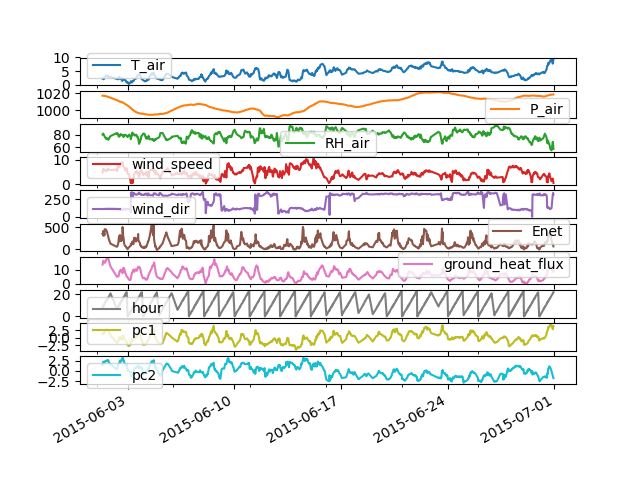

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a19697cf8>,
      dtype=object)

In [27]:
combined_df.plot(subplots=1)

In [28]:
#investigate the loadings
components = pd.DataFrame(pca.components_, 
                          columns=dataset.columns, 
                          index=['pc1', 'pc2'])
components


T_air     P_air    RH_air  wind_speed  wind_dir      Enet  \
pc1  0.489040  0.273170 -0.297455   -0.144341  0.217504  0.461911   
pc2 -0.197211 -0.349016 -0.168533    0.578141 -0.508809  0.307402   

     ground_heat_flux      hour  
pc1          0.481382  0.290700  
pc2          0.260219  0.235689

<IPython.core.display.Javascript object>


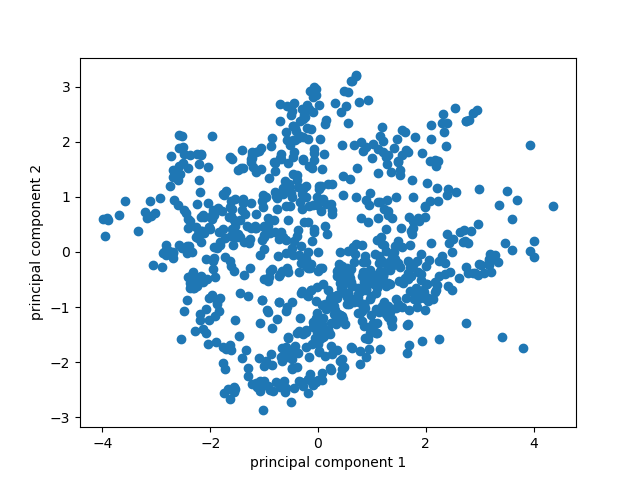

Text(0,0.5,'principal component 2')

In [36]:
#plot the transformed dataset
plt.scatter(principalDf['pc1'], principalDf['pc2'] )# , c=np.log(df_clean.LE))
plt.xlabel('principal component 1')
plt.ylabel('principal component 2')

In [35]:
xvector=pca.components_[0] * max(principalComponents[:,0])
yvector=pca.components_[1] * max(principalComponents[:,1])

for i in range(len(xvector)):
    plt.arrow(0,0, xvector[i], yvector[i] )
    plt.text(xvector[i], yvector[i], list(dataset.columns)[i])

In [21]:
# each PC explains a part of the total variance of the dataset
pca.explained_variance_ratio_

array([0.32376433, 0.14959529])

In [22]:
# run an OLS regression on principal components

combined_df['LE']=df_clean['LE'] #add LE to the dataframe again

model_pc = sm.ols("LE ~  + pc1 + pc2", combined_df).fit()
print(model_pc.summary())


                            OLS Regression Results                            
Dep. Variable:                     LE   R-squared:                       0.813
Model:                            OLS   Adj. R-squared:                  0.812
Method:                 Least Squares   F-statistic:                     1867.
Date:                Tue, 20 Oct 2020   Prob (F-statistic):          1.21e-313
Time:                        08:50:31   Log-Likelihood:                -3021.1
No. Observations:                 863   AIC:                             6048.
Df Residuals:                     860   BIC:                             6063.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     19.2484      0.273     70.395      0.0

In [23]:
# plot the results as a time series 
a,b,c=model_pc.params
combined_df['LE_est']=a + b*combined_df['pc1'] + c*combined_df['pc2']

plt.plot(combined_df.index, combined_df.LE, label='obs')
plt.plot(combined_df.index, combined_df.LE_est, label='PC est')

plt.legend()
